In [1]:
from sbcbinaryformat import Streamer, Writer
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import copy

from GetEvent import GetEvent
#from SiPMPulses_wChanges import SiPMPulses

from SiPMPulsesWithChanges import SiPMPulses

from My_Ana.SiPM.UsefulScripts import *
    #visualcheck(data3, 7, 4, 'three point')
    #histogram([0,1,2],data3['rms'],'Baseline RMS')

In [2]:
ll = ['scintillation','run_control']

TEST_RUN = "/exp/e961/data/SBC-25-daqdata/20250703_45/"
TEST_EVT = 0

#data = GetEvent(TEST_RUN, TEST_EVT,*ll)
ev = GetEvent(TEST_RUN, TEST_EVT,*ll)

In [3]:
data3 = SiPMPulses(ev,3)

In [4]:
data5 = SiPMPulses(ev,5)

In [5]:



#SWITCHING TO RMS ANALYSIS




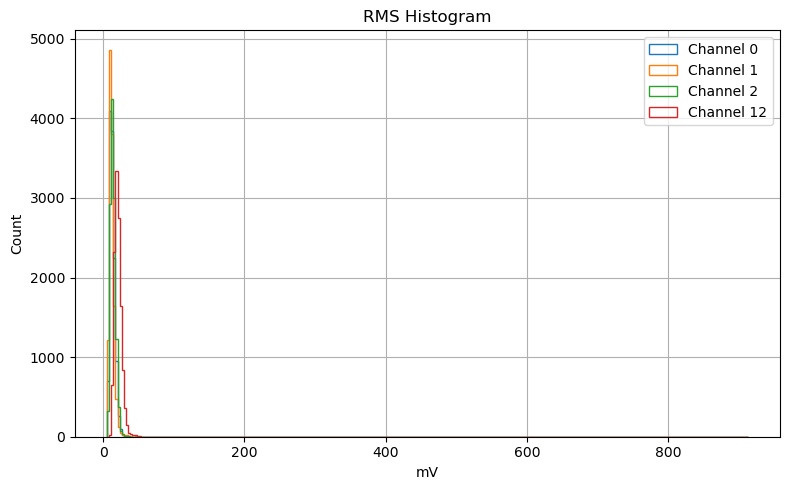

12237


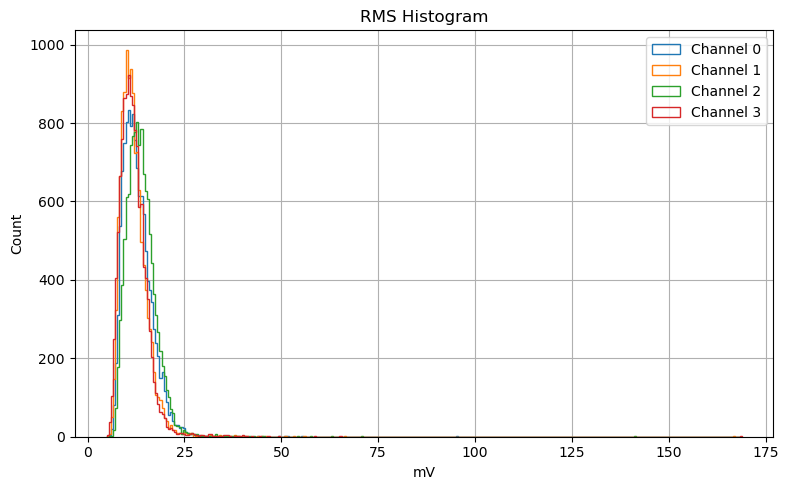

In [6]:
# Combined Baseline histograms

#RMS is calculated before smoothing so is the same for all smoothing

selected_channels = [0,1,2,12]
histogram(selected_channels,data5['rms'],'RMS')
print(len(data5['rms'][12,:]))



selected_channels = [0,1,2,3]
histogram(selected_channels,data5['rms'],'RMS')

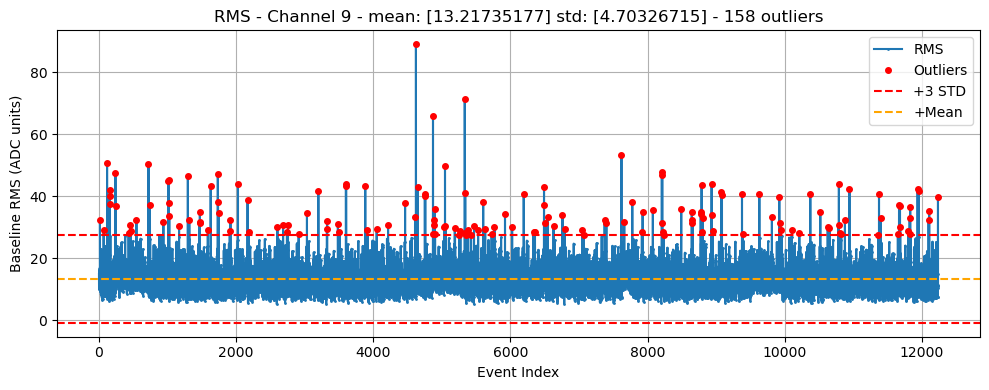

***************************************************************************
Outliers 

[14, 68, 118, 155, 157, 160, 240, 241, 432, 454, 465, 546, 722, 743, 939, 1008, 1016, 1019, 1025, 1168, 1296, 1317, 1466, 1471, 1472, 1587, 1629, 1733, 1736, 1745, 1907, 1917, 2027, 2167, 2187, 2602, 2685, 2741, 2756, 2912, 3033, 3199, 3324, 3327, 3484, 3507, 3601, 3604, 3883, 3909, 4050, 4216, 4464, 4609, 4622, 4647, 4752, 4758, 4870, 4871, 4888, 4892, 4895, 4901, 5035, 5046, 5052, 5189, 5251, 5270, 5334, 5335, 5341, 5347, 5384, 5426, 5469, 5529, 5603, 5632, 5726, 5767, 5921, 6025, 6194, 6337, 6358, 6489, 6490, 6500, 6541, 6629, 6759, 6792, 7045, 7067, 7374, 7399, 7619, 7660, 7777, 7917, 7928, 8077, 8208, 8211, 8214, 8224, 8237, 8491, 8645, 8648, 8654, 8775, 8782, 8788, 8801, 8804, 8934, 8937, 8951, 9076, 9085, 9377, 9385, 9630, 9813, 9921, 9936, 9942, 10105, 10213, 10373, 10519, 10627, 10653, 10787, 10790, 10801, 10824, 10878, 10944, 11364, 11375, 11402, 11650, 11667, 11681, 11684, 11801, 11822, 11

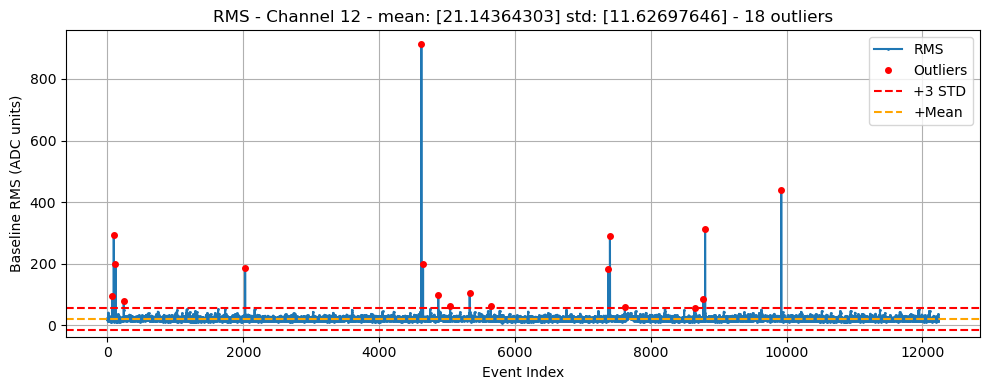

***************************************************************************
Outliers 

[68, 93, 118, 240, 2027, 4622, 4647, 4871, 5046, 5334, 5643, 7374, 7399, 7619, 8645, 8775, 8800, 9921]
***************************************************************************








In [7]:
selected_channels = [9,12]
#range(len(bl_health['rms_mean']))


for chan in selected_channels:

    vals = data3['rms'][chan]
    mean_val = data3['bl_health']['rms_mean'][chan]
    std_val = data3['bl_health']['rms_std'][chan]
    outlier_vals = data3['bl_health']['rms_outliers'][chan]

    plt.figure(figsize=(10, 4))
    plt.plot(vals, marker='.', linestyle='-', markersize=2, label="RMS")

    # Highlight outliers as red dots
    plt.plot(outlier_vals, vals[outlier_vals], 'ro', markersize=4, label="Outliers")

    # Horizontal lines at ±3σ
    plt.axhline(mean_val + 3*std_val, color='red', linestyle='--', label='+3 STD')
    plt.axhline(mean_val - 3*std_val, color='red', linestyle='--')
    plt.axhline(mean_val, color='orange', linestyle='--', label='+Mean')

    plt.title(f"RMS - Channel {chan} - mean: {mean_val} std: {std_val} - {len(outlier_vals)} outliers")
    plt.xlabel("Event Index")
    plt.ylabel("Baseline RMS (ADC units)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print('*' * 75)
    print('Outliers \n')
    print(f'{outlier_vals}')
    print('*' * 75)
    print('\n' * 5)


In [11]:
for chan in range(len(data3['bl_health']['rms_mean'])):
    print(f'Channel {chan} has {len(data3['bl_health']["rms_outliers"][chan])} rms outliers:')
    print(data3['bl_health']["rms_outliers"][chan])
    print('\n'*5)

Channel 0 has 112 rms outliers:
[14, 68, 78, 118, 157, 240, 241, 272, 606, 822, 1025, 1100, 1147, 1167, 1210, 1280, 1296, 1317, 1629, 1631, 1733, 2027, 2167, 2269, 2568, 2622, 2741, 3027, 3601, 3819, 3913, 4050, 4168, 4216, 4218, 4592, 4620, 4622, 4647, 4752, 4870, 4871, 4874, 4895, 4901, 5032, 5046, 5192, 5332, 5334, 5337, 5396, 5603, 5775, 6194, 6380, 6609, 6759, 6959, 6981, 7227, 7374, 7399, 7550, 7619, 7742, 7777, 7846, 7928, 7931, 7933, 8014, 8200, 8208, 8289, 8491, 8645, 8695, 8715, 8775, 8788, 8800, 8834, 8934, 9116, 9274, 9291, 9377, 9435, 9465, 9630, 9651, 9665, 9731, 9813, 9946, 10192, 10653, 10878, 10942, 10964, 11125, 11375, 11646, 11681, 11909, 11938, 11952, 12035, 12079, 12098, 12107]






Channel 1 has 123 rms outliers:
[14, 118, 155, 157, 160, 240, 241, 325, 594, 606, 743, 746, 1008, 1025, 1167, 1280, 1296, 1317, 1451, 1471, 1584, 1600, 1629, 1733, 1917, 2027, 2167, 2622, 2741, 3199, 3324, 3601, 3604, 3753, 3756, 3782, 3887, 3909, 4050, 4204, 4216, 4458, 4609, 4622, 46

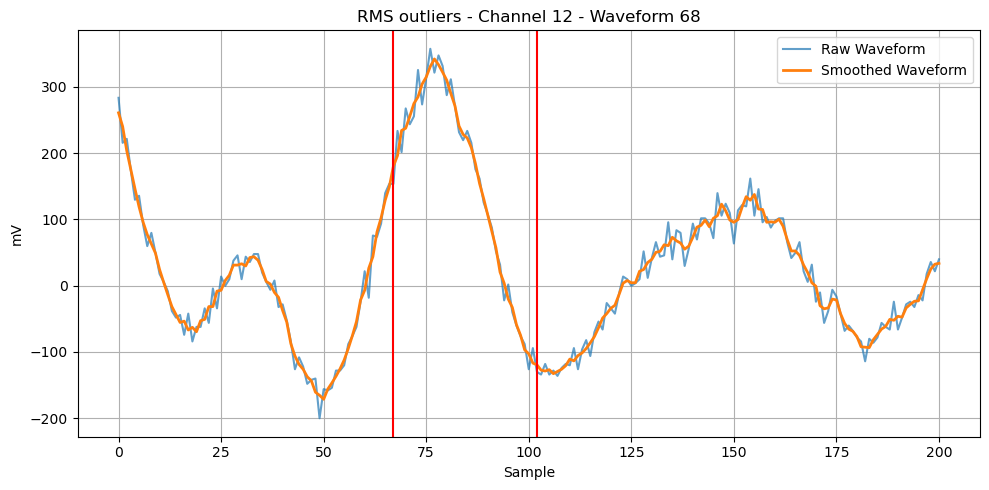

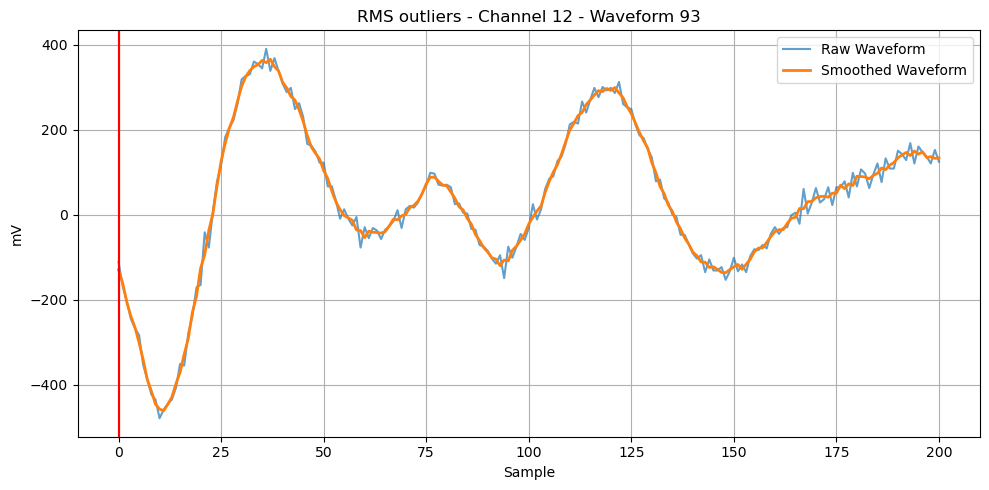

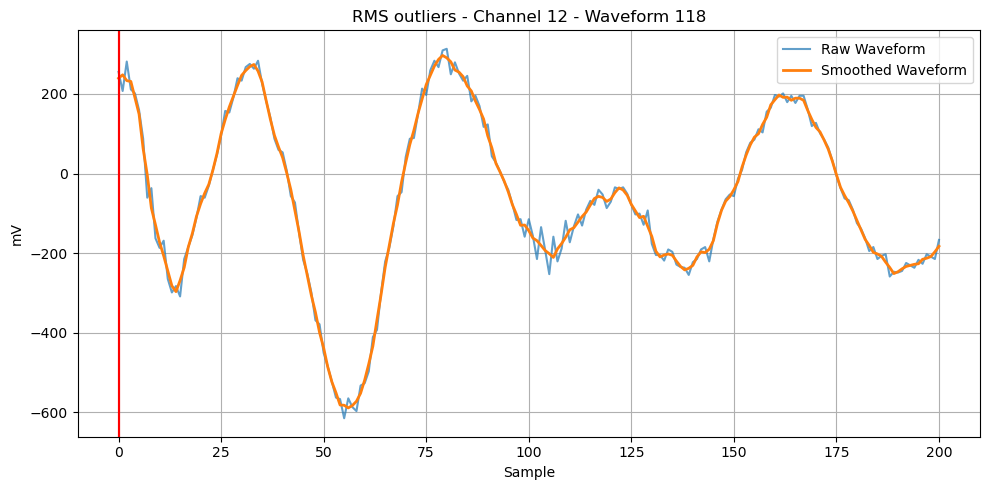

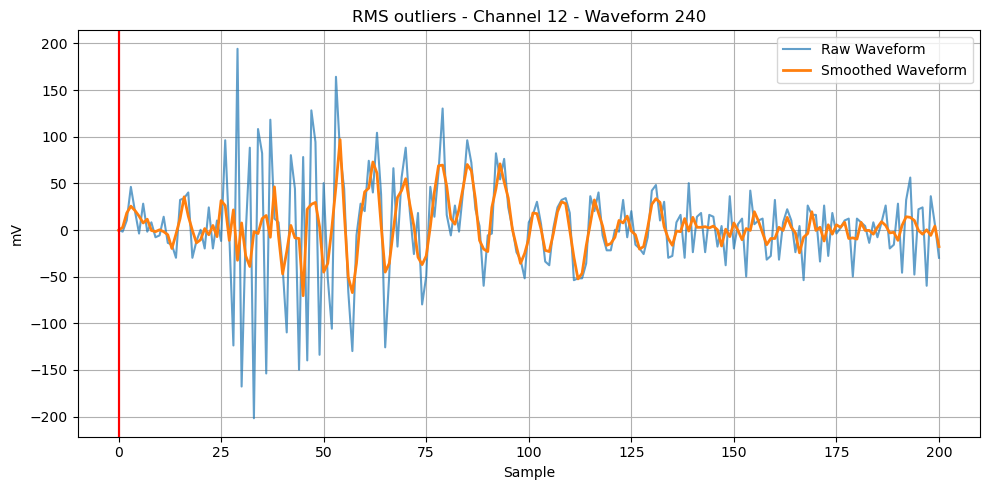

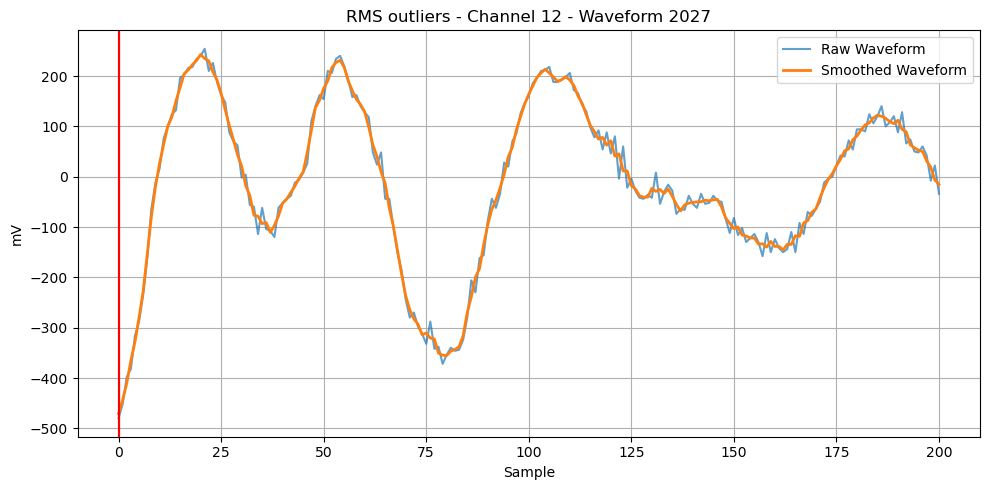

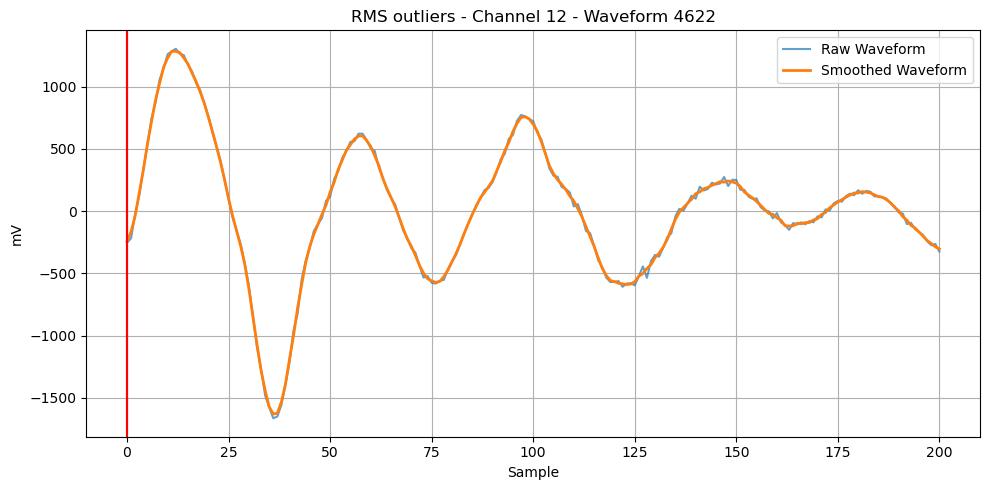

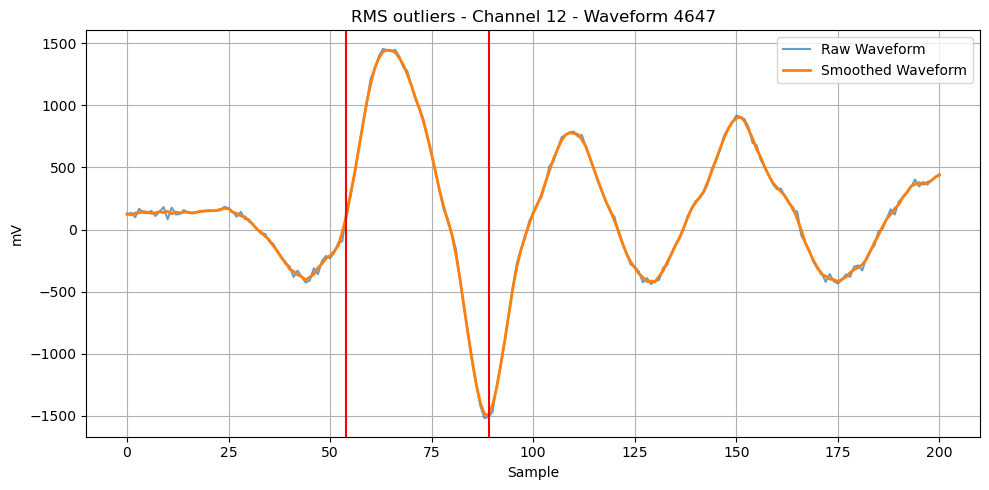

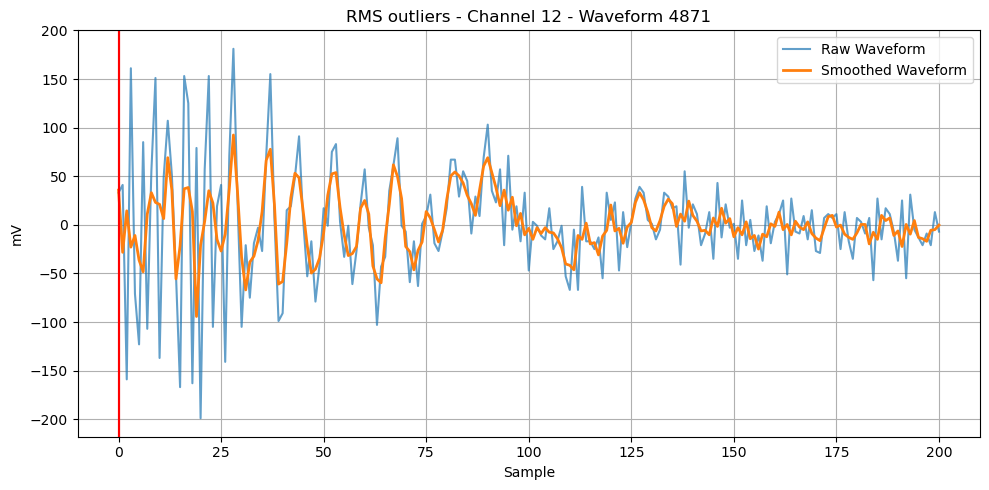

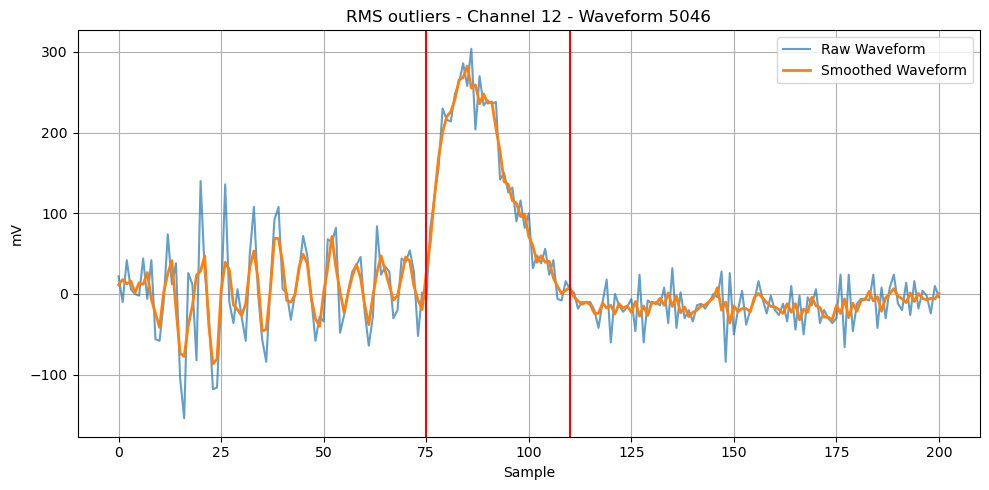

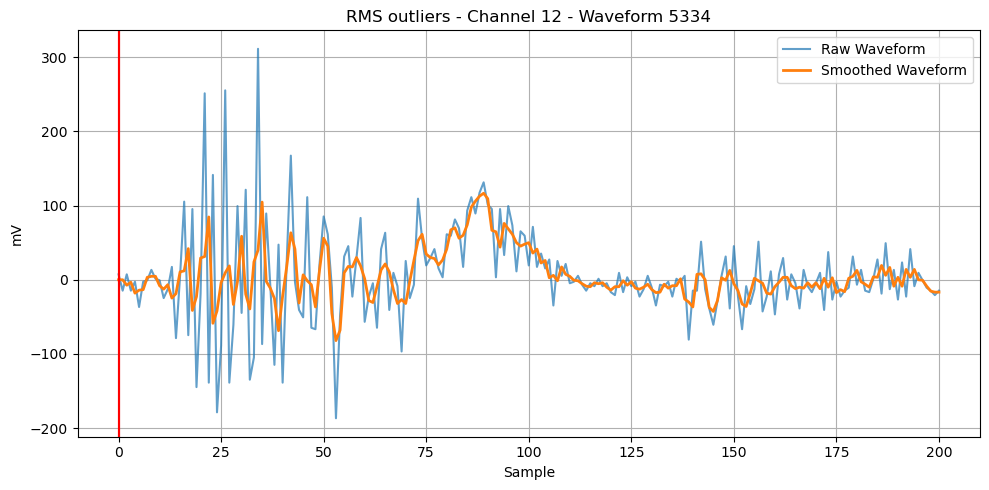

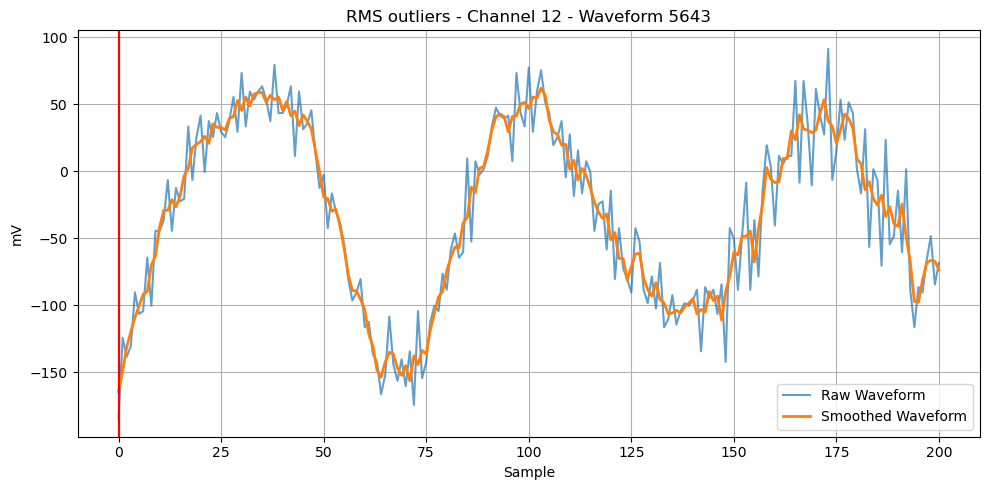

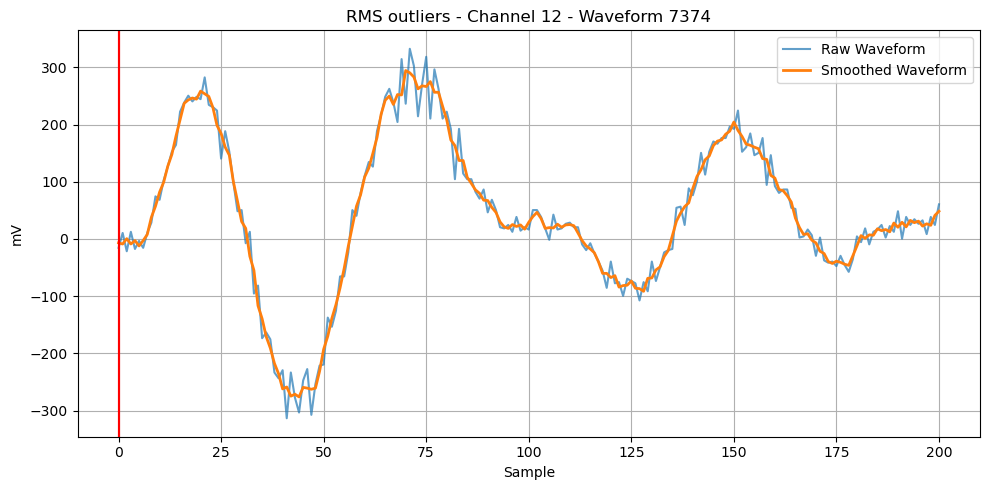

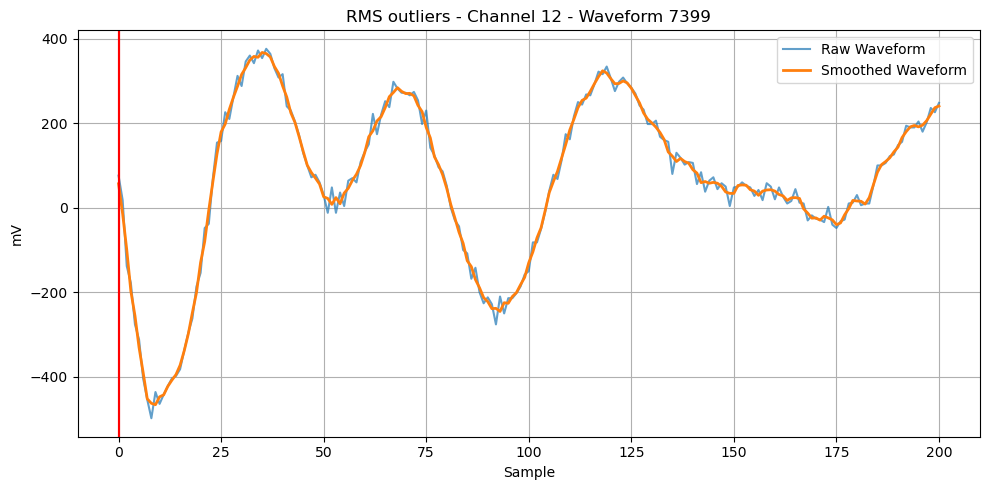

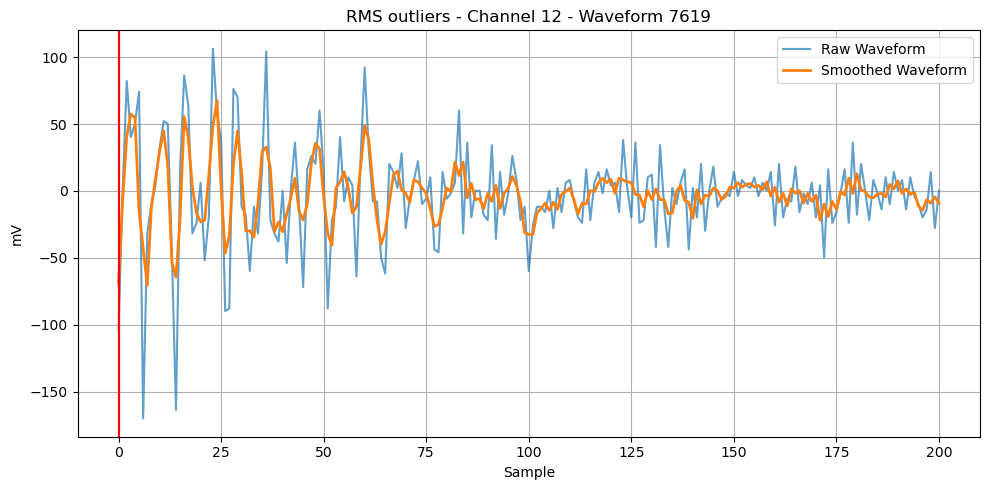

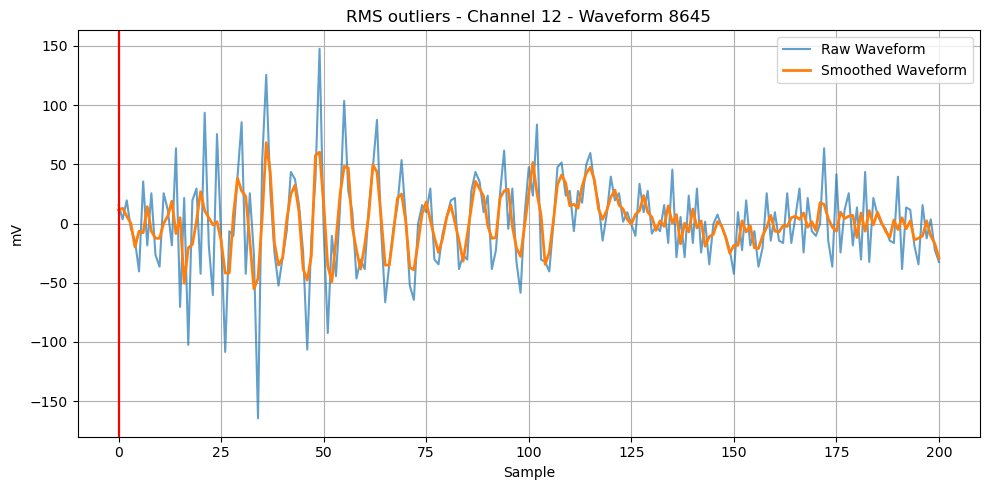

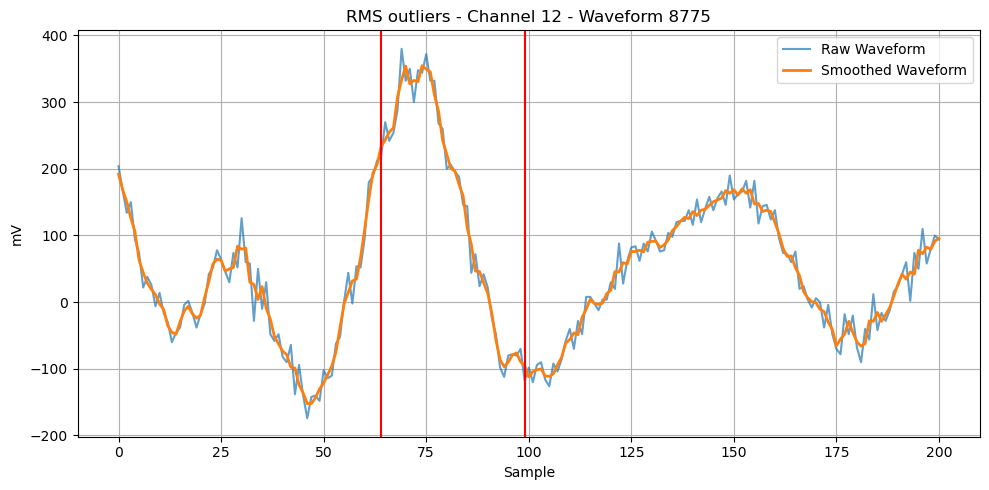

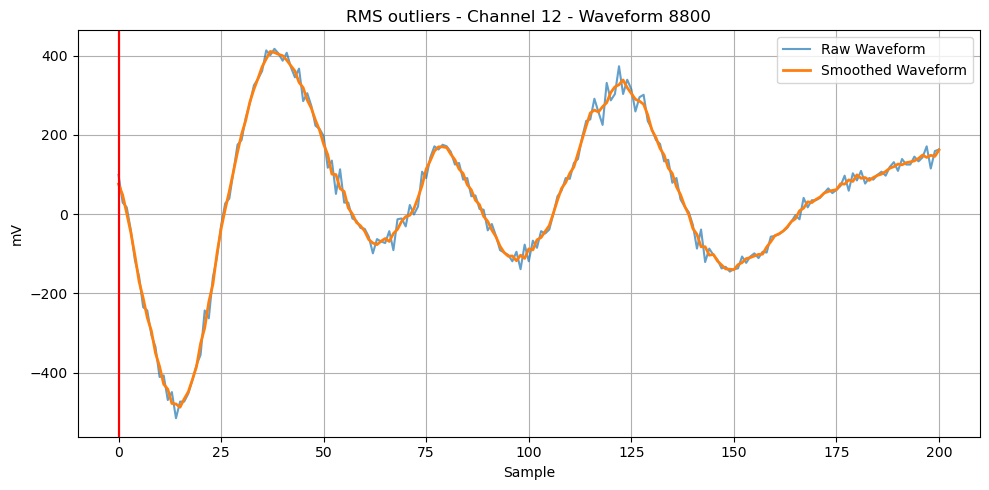

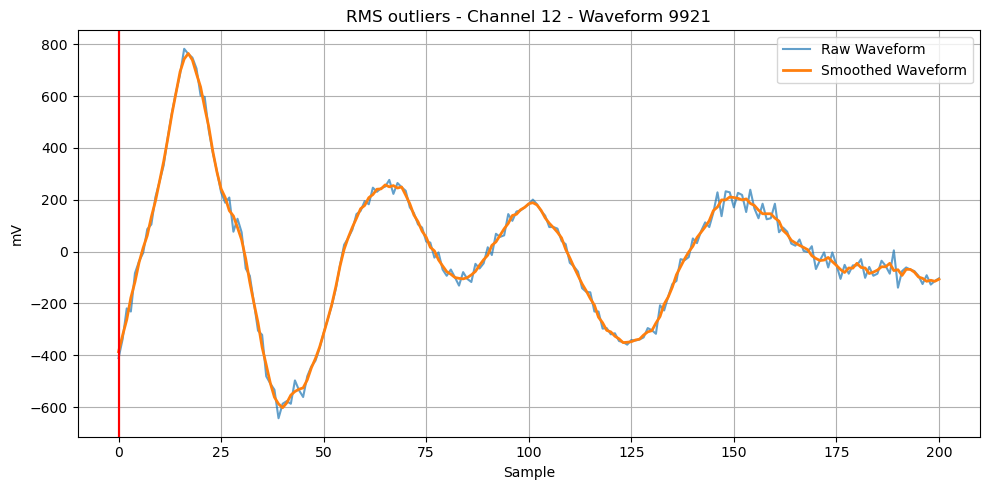

In [12]:
channel = 12

for ind in data3['bl_health']["rms_outliers"][channel]:
     visualcheck(data3, ind, channel, 'RMS outliers', True)

In [10]:






#SWITCHING TO BASELINE ANALYSIS





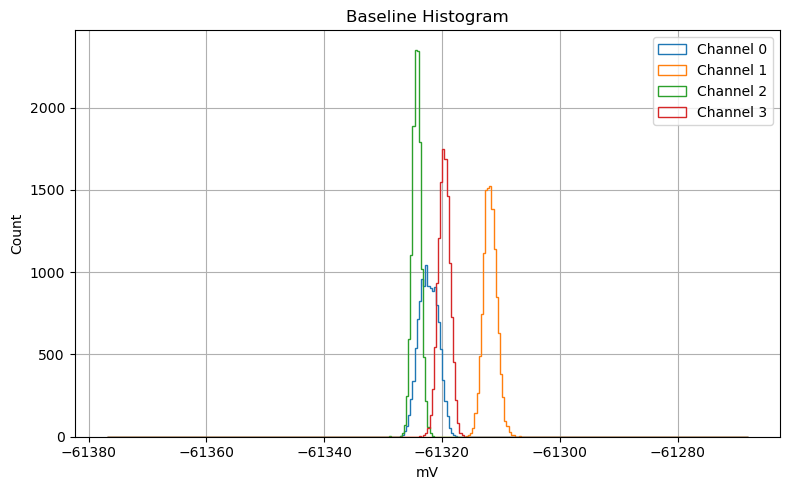

In [8]:
# Combined Baseline histograms

selected_channels = [0,1,2,3]

histogram(selected_channels,data5['baseline'],'Baseline')

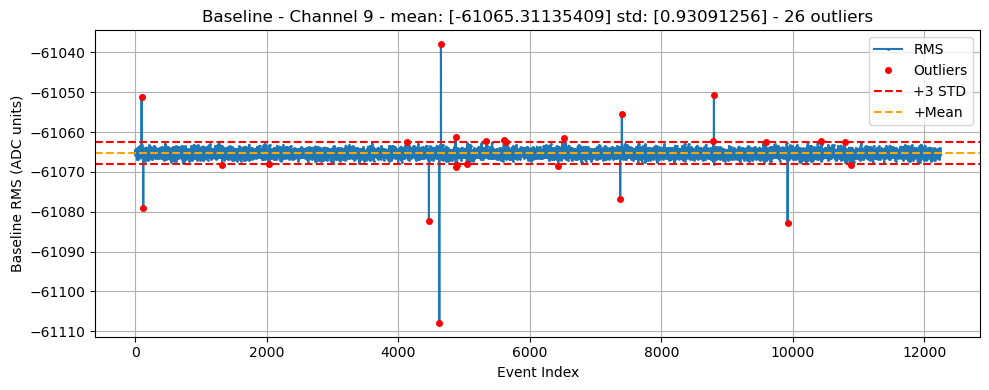

***************************************************************************
Outliers 

[93, 118, 1317, 2027, 4138, 4464, 4622, 4647, 4870, 4871, 4892, 5041, 5334, 5609, 5643, 6428, 6512, 7374, 7399, 8788, 8800, 9592, 9921, 10429, 10790, 10878]
***************************************************************************








In [12]:
#range(len(bl_health['rms_mean']))

selected_channels = [9]

for chan in selected_channels:

    vals = data3['baseline'][chan]
    mean_val = data3['bl_health']['bl_mean'][chan]
    std_val = data3['bl_health']['bl_std'][chan]
    outlier_vals = data3['bl_health']['bl_outliers'][chan]

    plt.figure(figsize=(10, 4))
    plt.plot(vals, marker='.', linestyle='-', markersize=2, label="RMS")

    # Highlight outliers as red dots
    plt.plot(outlier_vals, vals[outlier_vals], 'ro', markersize=4, label="Outliers")

    # Horizontal lines at ±3σ
    plt.axhline(mean_val + 3*std_val, color='red', linestyle='--', label='+3 STD')
    plt.axhline(mean_val - 3*std_val, color='red', linestyle='--')
    plt.axhline(mean_val, color='orange', linestyle='--', label='+Mean')

    plt.title(f"Baseline - Channel {chan} - mean: {mean_val} std: {std_val} - {len(outlier_vals)} outliers")
    plt.xlabel("Event Index")
    plt.ylabel("Baseline RMS (ADC units)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print('*' * 75)
    print('Outliers \n')
    print(f'{outlier_vals}')
    print('*' * 75)
    print('\n' * 5)

In [15]:
for chan in range(len(data3['bl_health']['bl_mean'])):
    print(f'Channel {chan} has {len(data3['bl_health']["bl_outliers"][chan])} baseline outliers:')
    print(data3['bl_health']["bl_outliers"][chan])
    print('\n'*1)

Channel 0 has 14 baseline outliers:
[68, 93, 118, 2027, 4592, 4622, 4647, 5643, 7374, 7399, 8775, 8800, 9921, 9946]


Channel 1 has 17 baseline outliers:
[93, 118, 1025, 1600, 2027, 4622, 4647, 4975, 5052, 5643, 7374, 7399, 7953, 8205, 8800, 9321, 9921]


Channel 2 has 16 baseline outliers:
[68, 93, 118, 2027, 3887, 4317, 4622, 4647, 5643, 7374, 7399, 8733, 8775, 8800, 9921, 11610]


Channel 3 has 16 baseline outliers:
[93, 118, 546, 4622, 4647, 5643, 5921, 7374, 7399, 7931, 8800, 9921, 9959, 10227, 11233, 12016]


Channel 4 has 23 baseline outliers:
[68, 93, 1008, 2027, 2741, 3892, 4200, 4622, 4647, 4870, 5643, 7399, 7660, 7931, 7933, 8775, 8788, 8800, 9539, 9921, 9942, 10213, 10519]


Channel 5 has 14 baseline outliers:
[68, 73, 93, 118, 2027, 2032, 4622, 4627, 4647, 5643, 7374, 7399, 8800, 9921]


Channel 6 has 19 baseline outliers:
[68, 93, 187, 1296, 1736, 2027, 3601, 4622, 4647, 5233, 5334, 7399, 7666, 7667, 8775, 8788, 8800, 9921, 11952]


Channel 7 has 29 baseline outliers:
[68

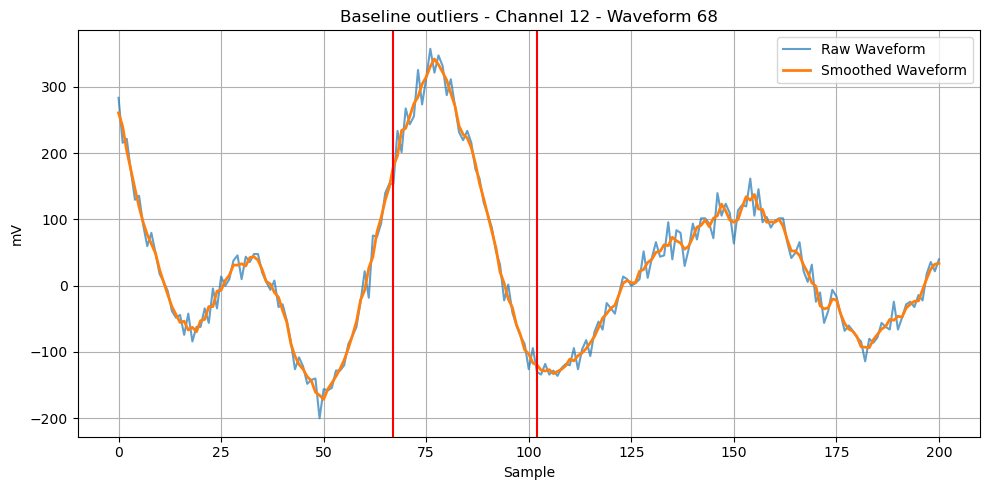

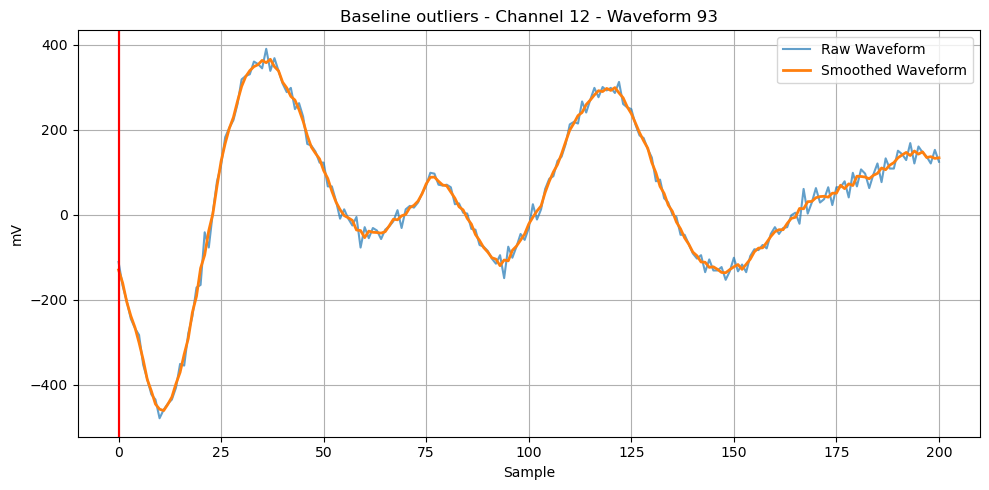

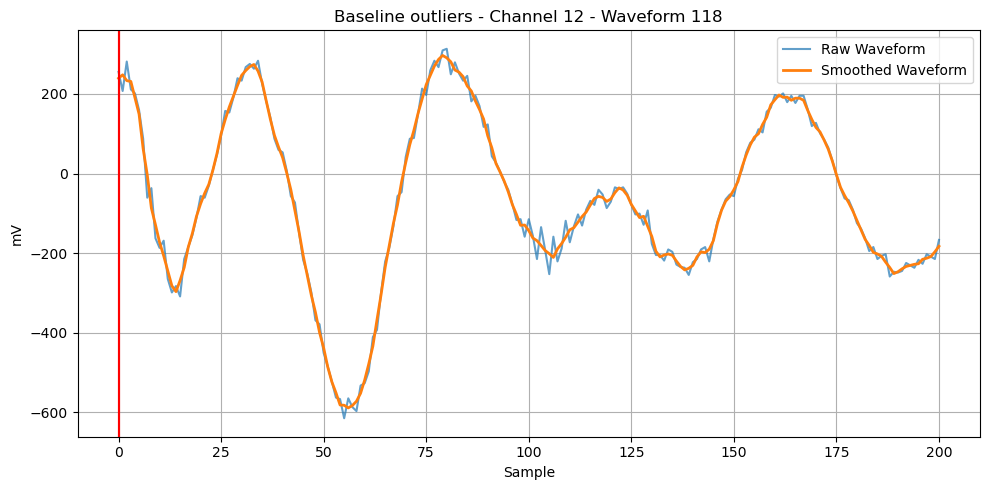

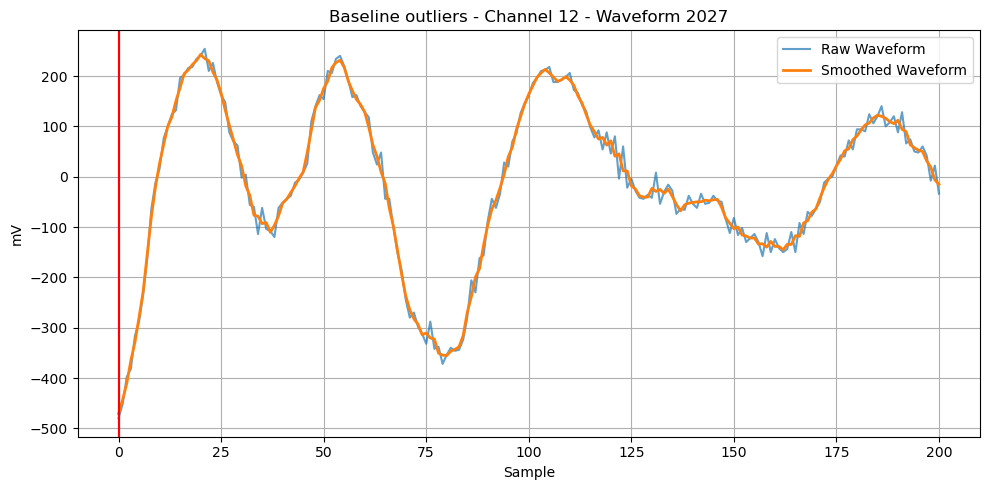

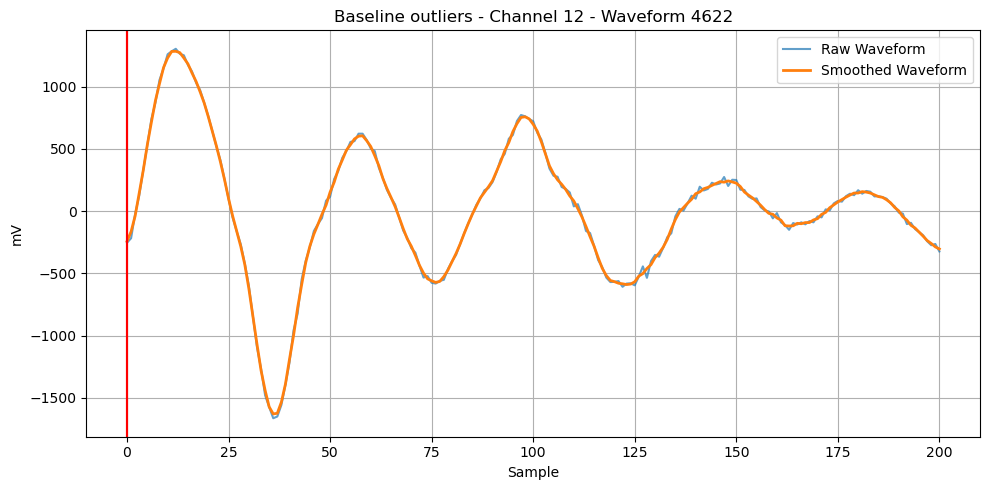

In [14]:
channel = 12

for ind in data3['bl_health']["bl_outliers"][channel][:5]:
     visualcheck(data3, ind, channel, 'Baseline outliers', True)

In [15]:






#All information together








In [16]:
print(f"{'Chan':<5} {'| RMS ':<6} {'| BL ':<6} {'|Common Outlier Indices'}")
print("-" * 60)

for chan in range(len(data3['bl_health']['rms_mean'])):
    rms_out = set(data3['bl_health']["rms_outliers"][chan])
    bl_out = set(data3['bl_health']["bl_outliers"][chan])
    common = sorted(rms_out & bl_out)

    print(f"{chan:<6} {len(rms_out):<6} {len(bl_out):<6} {common}")

Chan  | RMS  | BL   |Common Outlier Indices
------------------------------------------------------------
0      112    14     [68, 118, 2027, 4592, 4622, 4647, 7374, 7399, 8775, 8800, 9946]
1      123    17     [118, 1025, 1600, 2027, 4622, 4647, 5052, 7374, 9921]
2      94     16     [118, 2027, 4622, 4647, 8775, 9921]
3      140    16     [118, 4622, 4647, 5921, 7374, 7931, 8800, 9921, 10227, 11233, 12016]
4      96     23     [93, 2027, 2741, 3892, 4622, 4647, 4870, 7399, 7931, 8775, 8788, 8800, 9921, 9942, 10213, 10519]
5      17     14     [68, 93, 118, 2027, 4622, 4647, 5643, 7374, 7399, 8800, 9921]
6      137    19     [93, 1296, 2027, 3601, 4622, 4647, 5334, 7399, 8788, 8800, 9921, 11952]
7      140    29     [93, 118, 1296, 2027, 2167, 2741, 2756, 3601, 4622, 4647, 4752, 5603, 7399, 7931, 8648, 8788, 8800, 9630, 9921, 9942]
8      124    24     [118, 1167, 3601, 4622, 4647, 8214, 8645, 8788]
9      158    26     [118, 1317, 2027, 4464, 4622, 4647, 4870, 4871, 4892, 5334, 7374,

In [17]:
print(f"{'Chan':<5} | {'RMS mean':<10} | {'RMS STD':<10} | {'BL mean':<10} | {'BL STD':<10}")
print("-" * 60)

for chan in range(len(data3['bl_health']['rms_mean'])):
    rms_mean = data3['bl_health']["rms_mean"][chan].item()
    rms_std = data3['bl_health']["rms_std"][chan].item()
    bl_mean = data3['bl_health']["bl_mean"][chan].item()
    bl_std = data3['bl_health']["bl_std"][chan].item()

    print(f"{chan:<5} | {rms_mean:<10.2f} | {rms_std:<10.2f} | {bl_mean:<10.2f} | {bl_std:<10.2f}")


Chan  | RMS mean   | RMS STD    | BL mean    | BL STD    
------------------------------------------------------------
0     | 12.84      | 3.73       | -61322.33  | 1.77      
1     | 11.97      | 3.90       | -61311.86  | 1.39      
2     | 13.78      | 3.91       | -61324.33  | 0.97      
3     | 11.88      | 3.94       | -61319.67  | 1.24      
4     | 11.68      | 4.09       | -61326.03  | 1.03      
5     | 17.71      | 15.12      | -61324.99  | 6.96      
6     | 12.74      | 3.94       | -61326.56  | 1.05      
7     | 12.14      | 3.61       | -61328.79  | 0.99      
8     | 13.86      | 3.81       | -61063.13  | 0.72      
9     | 13.22      | 4.70       | -61065.31  | 0.93      
10    | 11.65      | 3.95       | -61057.03  | 1.42      
11    | 15.56      | 11.57      | -61059.24  | 2.02      
12    | 21.14      | 11.63      | -61056.03  | 2.62      
13    | 13.01      | 4.08       | -61077.68  | 1.09      
14    | 11.68      | 4.32       | -61069.44  | 1.23      
15    | 14.